# Exact fairness : analysis on SYNTHETIC dataset

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

**Constantes / variables globales :**

In [6]:
# 6, 20, 3
K = 4 # 6
N_FEATURES = 20
N_CLUSTERS = 3

**Libraries usuelles :**

In [7]:
## logistic regression for multi-class classification using a one-vs-rest
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.manifold import TSNE
from scipy.special import softmax
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

**Random seed :**

In [8]:
np.random.seed(777)

**Fairness functions :**

In [11]:
# Functions for creating datasets and ploting the ML performances
from synthetic_data import make_unfair_classif, data_viz, make_unfair_poolclassif

# Check the model's performance
from multiclass_performance import plot_confusion_matrix, get_multiclass_performance

# Optimization algorithm
from utils_optimization import optCE, optSAGD

# Functions for experimentation purposes
from multiclass_fairness import fair_soft_max, fair_hard_max, fair_each_score, prepare_fairness
from multiclass_fairness import run_fairness_experimentation, run_fair_each_score_experimentation, run_twomethods_experimentation
from multiclass_fairness import viz_fairness_results, print_fairness_results
from multiclass_fairness import analysis_argmax_fairness, analysis_twomethods_fairness
from multiclass_fairness import viz_fairness_analysis, viz_fairness_distributions, viz_fairness_distributions_uncond, viz_fairness_distributions_


## 1. Synthetic data : gaussian mixture and bernouilli contamination

### 1.1. Data

**Generate a random n-class classification problem which corresponds to the following baysian network :**

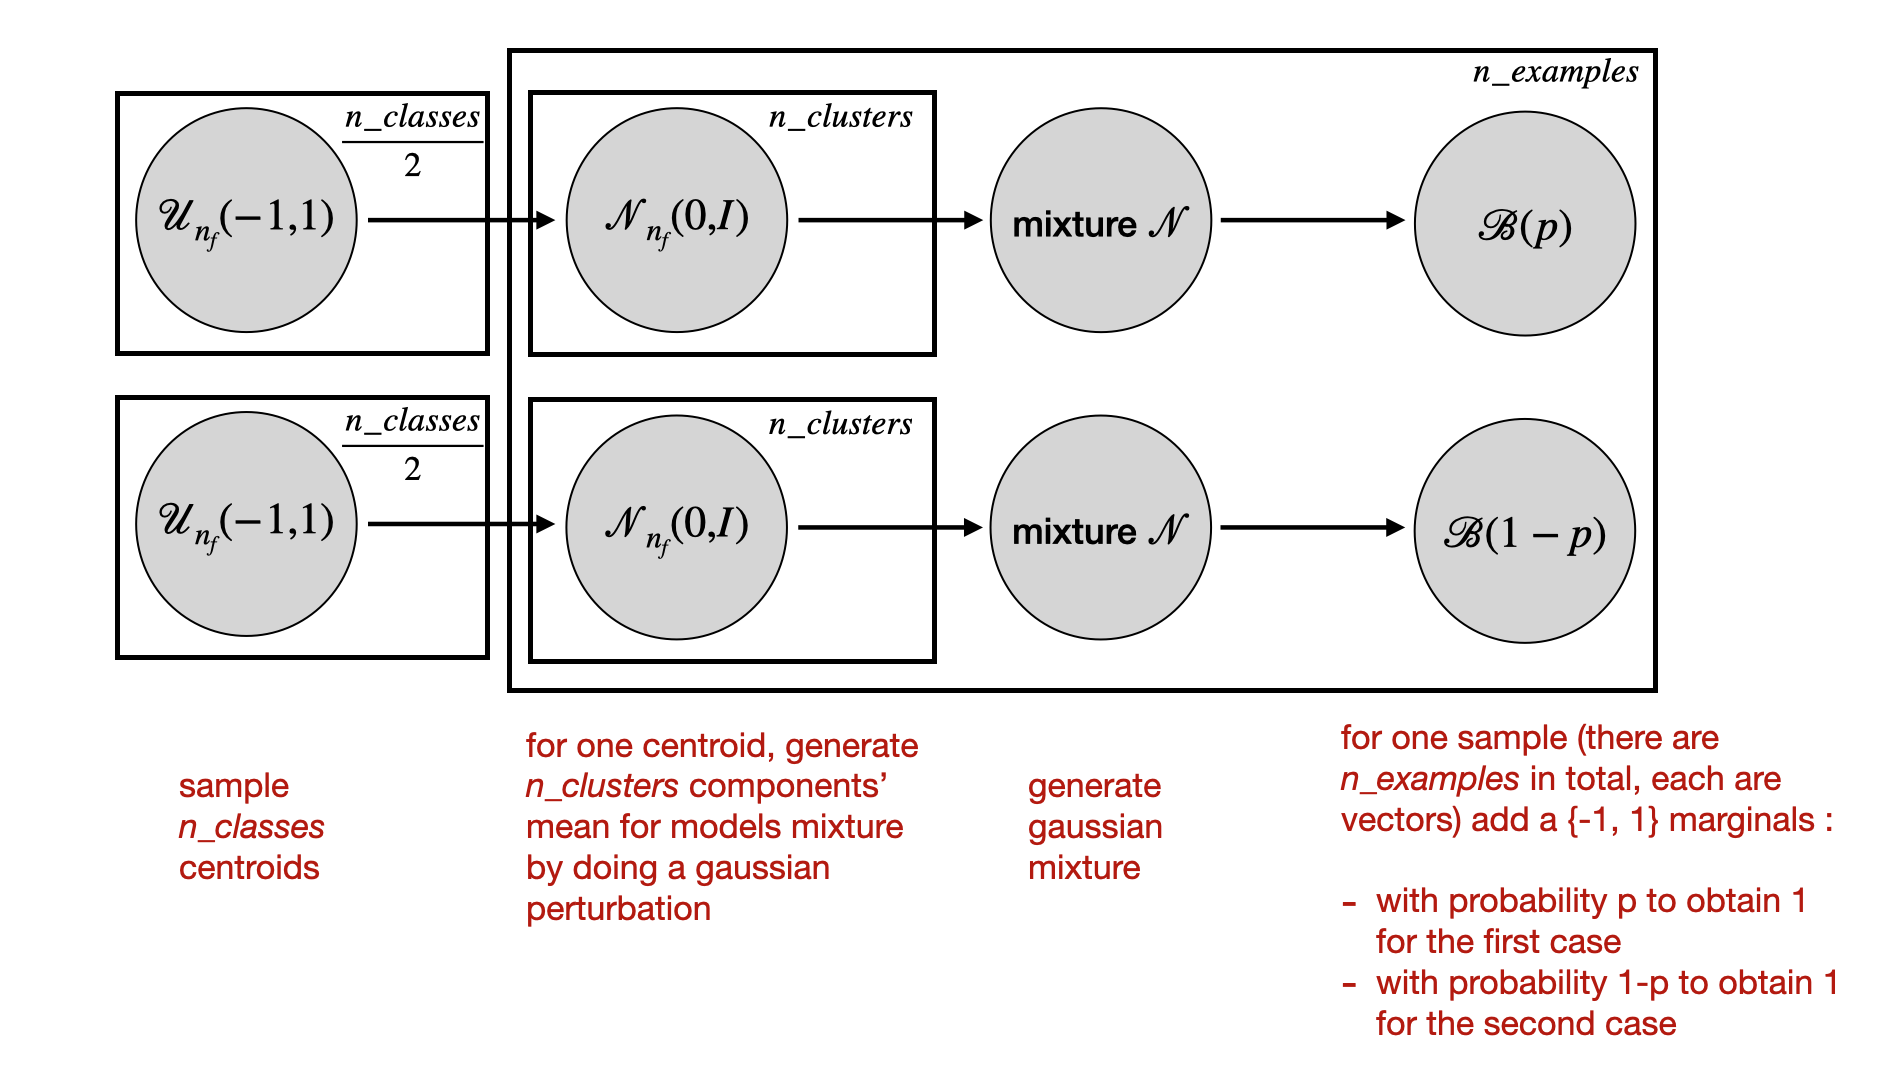

(5000, 21)
(5000, 21)
(5000,)


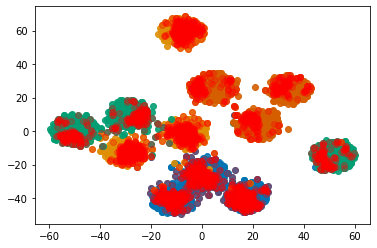

In [41]:
k = K
n_features = N_FEATURES
n_clusters = N_CLUSTERS
n_pool = 5000//K
n = 5000//K

X, y, X_pool= make_unfair_poolclassif(n = n, n_features = n_features, n_classes = k, n_clusters = n_clusters, n_pool = n_pool, p = 0.7)

print(X_pool.shape)
print(X.shape)
print(y.shape)

X_embedded = TSNE(n_components=2).fit_transform(X)
data_viz(X_embedded, y, X[:,-1])

### 1.2. Train-test-pool split

In [42]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("pool :", X_pool.shape)
print("train :", X_train.shape)
print("test :", X_test.shape)

pool : (5000, 21)
train : (3500, 21)
test : (1500, 21)


### 1.3. OvR logistic model and performances

test : 0.9573333333333334
train : 0.9502857142857143
Normalized confusion matrix


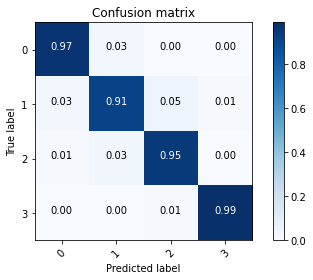

In [43]:
score_test, score_train, ovr = get_multiclass_performance(LogisticRegression(), X_train, X_test, y_train, y_test)

## 2. Fairness : plain pointwise result

### 2.1. method 1 : argmax-fair (computation of lambda)

#### 1.2.1. Distribution of the argmax

In [44]:
accs, kss, times, ind0, ind1, yd, yb, ydfh, ydfs, ybfh, ybfs = run_fairness_experimentation(
    RandomForestClassifier(),
    X,
    y,
    X_pool,
    n_times = 20,
    print_results = False,
    beta = 0.001,
    soft_opt = "SAGD",
    do_ovr = False) # True

Accuracies
 unfair : 0.97 +-0.004
 fair_soft : 0.8 +-0.007
 fair_hard : 0.8 +-0.008

Unfairness
 unfair : 0.75 +-0.04
 fair_soft : 0.07 +-0.03
 fair_hard : 0.07 +-0.03

Times
 fair_soft : 1.547 +-0.25
 fair_hard : 29.926 +-14.737


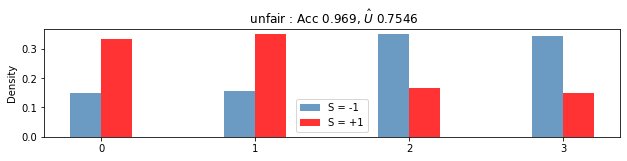

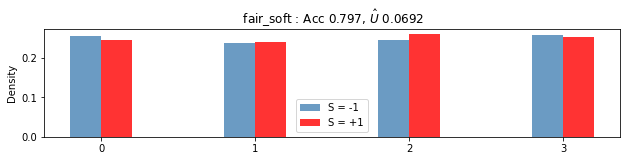

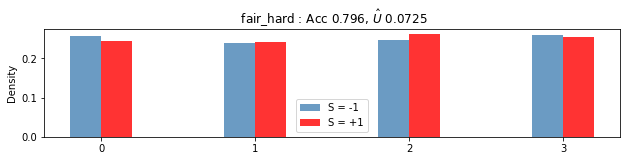

In [45]:
print_fairness_results(accs, kss, times)
viz_fairness_results(yd, ind0, ind1, accs, kss, "unfair")
viz_fairness_results(ydfs, ind0, ind1, accs, kss, "fair_soft")
viz_fairness_results(ydfh, ind0, ind1, accs, kss, "fair_hard")

#### 1.2.2. Distribution of each class probabiliy

**Empirical distribution of $P_{\text{fair}}(\text{class} | x, S)$ and $P_{\text{unfair}}(\text{class} | x, S)$**

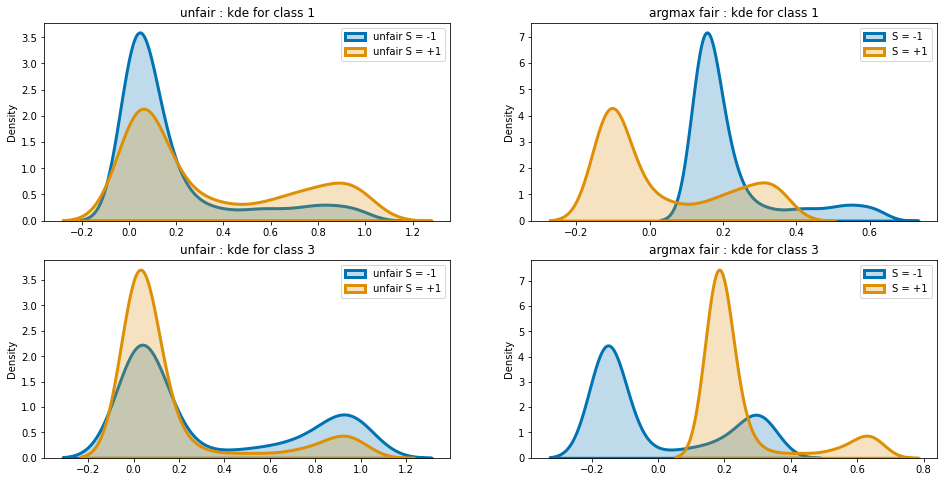

In [52]:
viz_fairness_distributions_(yb, ybfs, ind0, ind1, add_title="argmax")

### 2.2. method 2 : render score-fair (L2 risk)

#### 2.2.1. Distribution of the argmax

In [47]:
accs2, kss2, times2, ind02, ind12, yd2, yb2, ydf2, ybf2 = run_fair_each_score_experimentation(
    RandomForestClassifier(),
    X,
    y,
    X_pool,
    sigma = 10**(-5),
    n_times = 20,
    print_results = False,
    do_ovr = False) # True

Accuracies
 unfair : 0.97 +-0.004
 fair : 0.84 +-0.008

Unfairness
 unfair : 0.76 +-0.03
 fair : 0.2 +-0.03

Times
 fair : 0.21 +-0.054


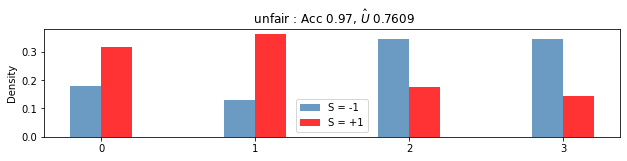

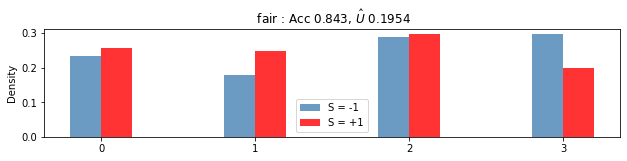

In [48]:
print_fairness_results(accs2, kss2, times2)
viz_fairness_results(yd2, ind02, ind12, accs2, kss2, "unfair")
viz_fairness_results(ydf2, ind02, ind12, accs2, kss2, "fair")

#### 2.2.2. Distribution of each class probabiliy

**Empirical distribution of $P_{\text{fair}}(\text{class} | x, S)$ and $P_{\text{unfair}}(\text{class} | x, S)$**

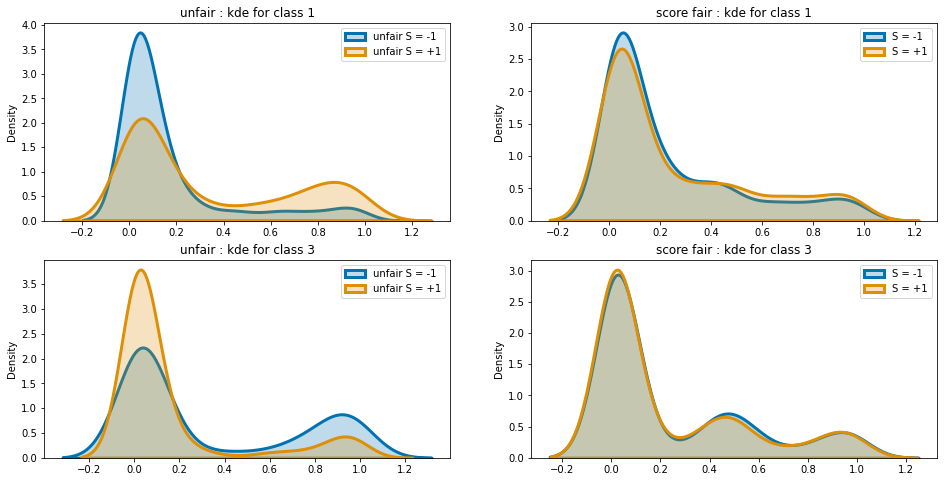

In [51]:
viz_fairness_distributions_(yb2, ybf2, ind02, ind12, add_title="score")

### 2.3 Both methods

In [12]:
# 6, 20, 3
K = 4
N_FEATURES = 10
N_CLUSTERS = 3

In [13]:
k = K
n_features = N_FEATURES
n_clusters = N_CLUSTERS
n_pool = 500
n = 500

X, y, X_pool= make_unfair_poolclassif(n = n, n_features = n_features, n_classes = k, n_clusters = n_clusters, n_pool = n_pool, p = 0.7)

print(X_pool.shape)
print(X.shape)
print(y.shape)

(2000, 11)
(2000, 11)
(2000,)


In [55]:
accs, kss, times, ind0, ind1, yd, yb, ydf_our, ydf_alter, ybf_our, ybf_alter = run_twomethods_experimentation(
    RandomForestClassifier(),
    X,
    y,
    X_pool,
    n_times = 30,
    print_results = True,
    beta = 0.005,
    do_ovr = False,
    sigma = 10**(-5))


ite : 0
ite : 10
ite : 20

Accuracies
 unfair : 0.91 +-0.01
 argmax-fair : 0.77 +-0.017
 score-fair : 0.8 +-0.016

Unfairness
 unfair : 0.75 +-0.05
 argmax-fair : 0.1 +-0.04
 score-fair : 0.16 +-0.05

Times
 argmax-fair : 0.726 +-0.137
 score-fair : 0.125 +-0.03


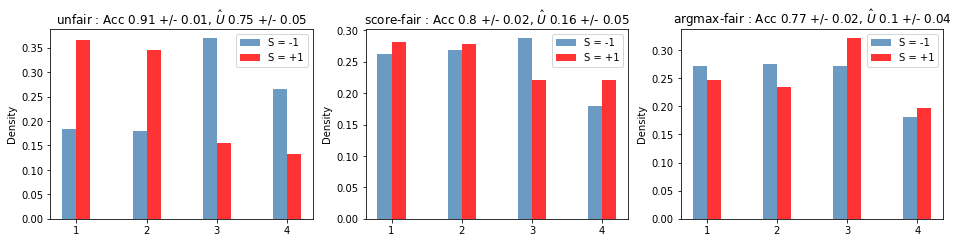

In [59]:
fig = plt.figure(figsize=(16, 3.5))
ax = fig.add_axes([0,0,1,1])

plt.subplot(1, 3, 1)
y_preds, index_0, index_1, acc_dict, ks_dict, name = yd, ind0, ind1, accs, kss, "unfair"

x = np.arange(1, len(np.unique(y_preds))+1)
plt.bar(x - 0.1, np.unique(y_preds[index_0], return_counts=True)[1]/len(y_preds[index_0]), alpha = 0.8, color = "steelblue", width=0.2)
plt.bar(x + 0.1, np.unique(y_preds[index_1], return_counts=True)[1]/len(y_preds[index_1]), alpha = 0.8, color = "red", width=0.2)
plt.ylabel('Density')
plt.title(rf'{name} : Acc {round(np.mean(acc_dict[name]), 2)} +/- {round(np.std(acc_dict[name]), 2)}, $\hat U$ {round(np.mean(ks_dict[name]), 2)} +/- {round(np.std(ks_dict[name]), 2)}')
plt.xticks(x)
plt.legend(labels=['S = -1', 'S = +1'])


plt.subplot(1, 3, 2)
y_preds, index_0, index_1, acc_dict, ks_dict, name = ydf_alter, ind0, ind1, accs, kss, "score-fair"

plt.bar(x - 0.1, np.unique(y_preds[index_0], return_counts=True)[1]/len(y_preds[index_0]), alpha = 0.8, color = "steelblue", width=0.2)
plt.bar(x + 0.1, np.unique(y_preds[index_1], return_counts=True)[1]/len(y_preds[index_1]), alpha = 0.8, color = "red", width=0.2)
plt.ylabel('Density')
plt.title(rf'{name} : Acc {round(np.mean(acc_dict[name]), 2)} +/- {round(np.std(acc_dict[name]), 2)}, $\hat U$ {round(np.mean(ks_dict[name]), 2)} +/- {round(np.std(ks_dict[name]), 2)}')
plt.xticks(x)
plt.legend(labels=['S = -1', 'S = +1'])


plt.subplot(1, 3, 3)
y_preds, index_0, index_1, acc_dict, ks_dict, name = ydf_our, ind0, ind1, accs, kss, "argmax-fair"

plt.bar(x - 0.1, np.unique(y_preds[index_0], return_counts=True)[1]/len(y_preds[index_0]), alpha = 0.8, color = "steelblue", width=0.2)
plt.bar(x + 0.1, np.unique(y_preds[index_1], return_counts=True)[1]/len(y_preds[index_1]), alpha = 0.8, color = "red", width=0.2)
plt.ylabel('Density')
plt.title(rf'{name} : Acc {round(np.mean(acc_dict[name]), 2)} +/- {round(np.std(acc_dict[name]), 2)}, $\hat U$ {round(np.mean(ks_dict[name]), 2)} +/- {round(np.std(ks_dict[name]), 2)}')
plt.xticks(x)
plt.legend(labels=['S = -1', 'S = +1'])


plt.show()

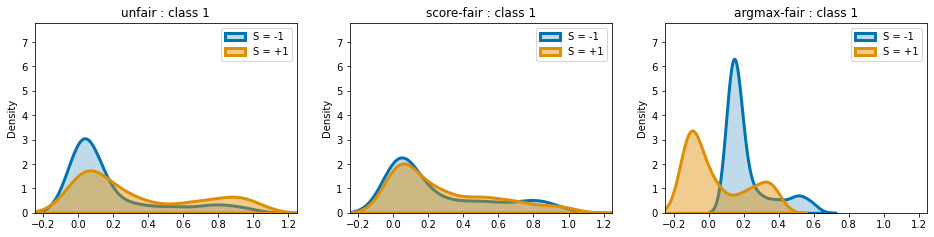

In [57]:
fig = plt.figure(figsize=(16, 3.5))
ax = fig.add_axes([0,0,1,1])
cl = 1

sns.set_palette("colorblind", 10)
sns.color_palette("colorblind", 10)

plt.subplot(1, 3, 1)
sns.kdeplot(yb[ind0, cl], shade= True, linewidth= 3)
sns.kdeplot(yb[ind1, cl], shade= True, linewidth= 3, alpha = 0.45)
plt.xlim([-0.25, 1.25])
plt.ylim([0, 7.8])
plt.legend(labels=['S = -1',  'S = +1'])
plt.title(f"unfair : class {cl}")

plt.subplot(1, 3, 2)
ybf, add_title = ybf_alter, "score-fair"
sns.kdeplot(ybf[ind0, cl], shade= True, linewidth= 3)
sns.kdeplot(ybf[ind1, cl], shade= True, linewidth= 3, alpha = 0.45)
plt.legend(labels=['S = -1', 'S = +1'])
plt.xlim([-0.25, 1.25])
plt.ylim([0, 7.8])
plt.title(f"{add_title} : class {cl}")

plt.subplot(1, 3, 3)
ybf, add_title = ybf_our, "argmax-fair"
sns.kdeplot(ybf[ind0, cl], shade= True, linewidth= 3)
sns.kdeplot(ybf[ind1, cl], shade= True, linewidth= 3, alpha = 0.45)
plt.xlim([-0.25, 1.25])
plt.ylim([0, 7.8])
plt.legend(labels=['S = -1', 'S = +1'])
plt.title(f"{add_title} : class {cl}");

## 3. Fairness : analysis of hyper-parameters

In [14]:
# 6, 20, 3
K = 4
N_FEATURES = 10
N_CLUSTERS = 3

In [15]:
n_pool = 200 # per class (for computing some quantities)
n = 800 # per class (for training and testing)

analysis_args = {"param" : "n_classes",
                 "param_range" : np.arange(5, 25, 5),
                 "n" : n,
                 "n_features" : N_FEATURES,
                 "n_classes" : K,
                 "n_clusters" : N_CLUSTERS,
                 "n_pool" : n_pool,
                 "p" : 0.7,
                 "n_times" : 5,
                 "model" : RandomForestClassifier(),
                 "beta" : 0.01,
                 "print_ites" : True,
                 "compute_hard" : False,
                 "draw_pool_in_train" : False,
                 "do_ovr" : False}

analysis_args_twomethods = {"param" : "n_classes",
                             "param_range" : np.arange(5, 25, 5),
                             "n" : n,
                             "n_features" : N_FEATURES,
                             "n_classes" : K,
                             "n_clusters" : N_CLUSTERS,
                             "n_pool" : n_pool,
                             "p" : 0.7,
                             "n_times" : 5,
                             "model" : RandomForestClassifier(),
                             "beta" : 0.01,
                             "print_ites" : True,
                             "draw_pool_in_train" : False,
                             "do_ovr" : False}

### 3.1. Method 1

#### 3.1.0. Analysis of n_pool (splitting strategy)

**Increase of unlabeled dataset without reducing the training set**

In [8]:
# graphical way to see the differences

In [23]:
n_pool_range = np.arange(0, 410, 200)

analysis_args["param"] = "n_pool"
analysis_args["draw_pool_in_train"] = False
analysis_args["n_times"] = 1
analysis_args["param_range"] = n_pool_range
analysis_args["print_ites"] = False

kss_vals = {"unfair" : [], "fair_soft" : []}
accs_vals = {"unfair" : [], "fair_soft" : []}

for _ in range(30):
    kss_pools, accs_pools, times_pools = analysis_argmax_fairness(**analysis_args)
    
    kss_vals["unfair"].append(kss_pools["unfair"]["mean"])
    accs_vals["unfair"].append(accs_pools["unfair"]["mean"])
    
    kss_vals["fair_soft"].append(kss_pools["fair_soft"]["mean"])
    accs_vals["fair_soft"].append(accs_pools["fair_soft"]["mean"])

analysis_args["print_ites"] = True

In [24]:
import pandas as pd

unfair_accs = pd.DataFrame(np.ndarray.flatten(np.array(accs_vals["unfair"])[:,:2], order="F"), columns=["Accuracy"])
unfair_accs["legend"] = "unfair"
unfair_accs["splitting"] = "yes"
unfair_accs.loc[:29, "splitting"] = "no"

fair_accs = pd.DataFrame(np.ndarray.flatten(np.array(accs_vals["fair_soft"])[:,:2], order="F"), columns=["Accuracy"])
fair_accs["legend"] = "fair"
fair_accs["splitting"] = "yes"
fair_accs.loc[:29, "splitting"] = "no"

accs_hue = pd.concat([unfair_accs, fair_accs])

unfair_kss = pd.DataFrame(np.ndarray.flatten(np.array(kss_vals["unfair"])[:,:2], order="F"), columns=["Unfairness"])
unfair_kss["legend"] = "unfair"
unfair_kss["splitting"] = "yes"
unfair_kss.loc[:29, "splitting"] = "no"

fair_kss = pd.DataFrame(np.ndarray.flatten(np.array(kss_vals["fair_soft"])[:,:2], order="F"), columns=["Unfairness"])
fair_kss["legend"] = "fair"
fair_kss["splitting"] = "yes"
fair_kss.loc[:29, "splitting"] = "no"

kss_hue = pd.concat([unfair_kss, fair_kss])

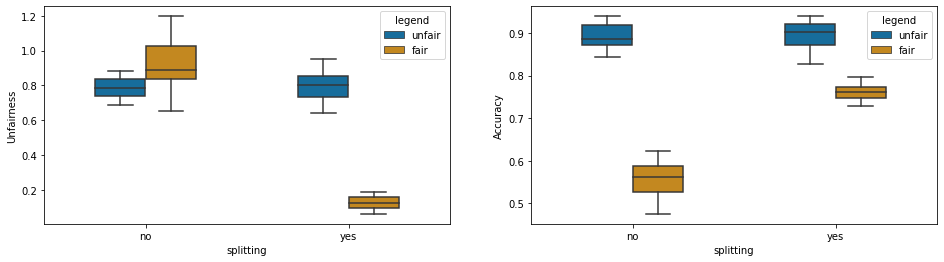

In [25]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
bplot=sns.boxplot(data=kss_hue, width=0.5, hue = "legend", x="splitting", y="Unfairness", showfliers=False, palette="colorblind")
plt.subplot(1, 2, 2)
bplot=sns.boxplot(data=accs_hue, width=0.5, hue = "legend", x="splitting", y="Accuracy", showfliers=False, palette="colorblind")


#### 3.1.1. Analysis of K

In [9]:
# np.arange(5, 35, 5)
n_classes_range = np.arange(5, 45, 5)

analysis_args["param"] = "n_classes"
analysis_args["n_times"] = 20
analysis_args["draw_pool_in_train"] = False
analysis_args["param_range"] = n_classes_range

kss_classes, accs_classes, times_classes = analysis_argmax_fairness(**analysis_args)

5
10
15
20
25
30
35
40


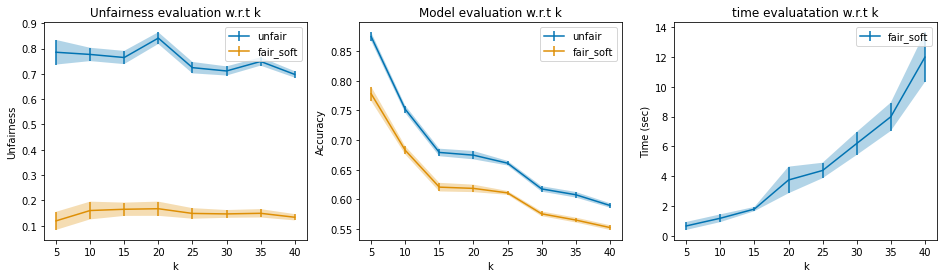

In [12]:
viz_fairness_analysis("k", n_classes_range, kss_classes, accs_classes, times_classes)

In [30]:
import pickle

pickle.dump(accs_classes_twomethods, open('accs_classes_twomethods.pickle', 'wb'))
pickle.dump(kss_classes_twomethods, open('kss_classes_twomethods.pickle', 'wb'))

#accs_classes_twomethods = pickle.load(open('accs_classes_twomethods.pickle', "rb"))
#kss_classes_twomethods = pickle.load(open('kss_classes_twomethods.pickle', "rb"))
#n_classes_range = np.arange(5, 35, 5)#np.arange(5, 40, 5)

In [16]:
# np.arange(5, 35, 5)
n_classes_range = np.arange(5, 30, 5)#np.arange(5, 40, 5)

analysis_args_twomethods["param"] = "n_classes"
analysis_args_twomethods["n_times"] = 15
analysis_args_twomethods["draw_pool_in_train"] = False
analysis_args_twomethods["param_range"] = n_classes_range

kss_classes_twomethods, accs_classes_twomethods, times_classes_twomethods = analysis_twomethods_fairness(**analysis_args_twomethods)


5
10
15
20
25
30


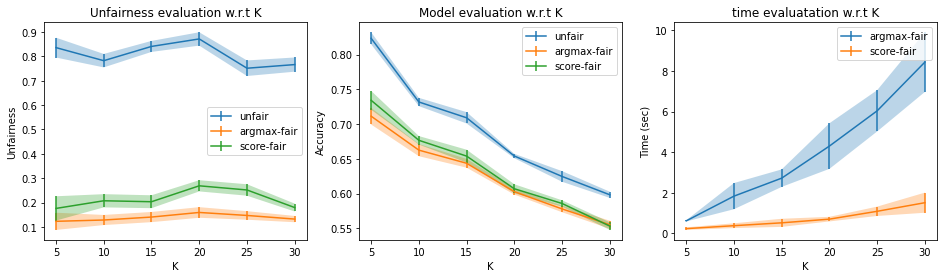

In [17]:
viz_fairness_analysis("K", n_classes_range, kss_classes_twomethods, accs_classes_twomethods, times_classes_twomethods)

In [27]:

def add_arrow(line, position=None, direction='right', size=30, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()
    
    try:
        if position is None:
            position = ydata.mean()
        # find closest index
        start_ind = np.argmin(np.absolute(ydata - position))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="->", color=color, lw = 2),
            size=size
        )
    except:
        if position is None:
            position = xdata.mean()
        # find closest index
        start_ind = np.argmin(np.absolute(xdata - position))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="->", color=color, lw = 2),
            size=size
        )


def viz_fairness_analysis(param, param_range, kss_param, accs_param, times_param, pareto = False):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

    sns.set_palette("colorblind")
    
    for fair_name in kss_param.keys():
        x = np.array(param_range)
        y = np.array(kss_param[fair_name]["mean"])
        std = np.array(kss_param[fair_name]["std"])
        #plt.plot(x, y, label=fair_name, marker='o')
        axes[0].errorbar(x, y, label=fair_name, yerr=std)
        axes[0].fill_between(x, (y-std), (y+std), alpha=.3)
    axes[0].legend()
    axes[0].set_title(f"Unfairness evaluation w.r.t {param}")
    axes[0].set_xlabel(param)
    axes[0].set_ylabel("Unfairness")

    for fair_name in accs_param.keys():
        x = np.array(param_range)
        y = np.array(accs_param[fair_name]["mean"])
        std = np.array(accs_param[fair_name]["std"])
        #plt.plot(x, y, label=fair_name, marker='|', ms = 10)
        axes[1].errorbar(x, y, label=fair_name, yerr=std)
        axes[1].fill_between(x, (y-std), (y+std), alpha=.3)
    axes[1].legend()
    axes[1].set_title(f"Model evaluation w.r.t {param}")
    axes[1].set_xlabel(param)
    axes[1].set_ylabel("Accuracy")
    
    if pareto:
        for fair_name in accs_param.keys():
            x = np.array(kss_param[fair_name]["mean"])
            y = np.array(accs_param[fair_name]["mean"])
            line = axes[2].plot(x, y, label=fair_name, lw = 2)[0]
            add_arrow(line)
            line.axes.annotate(f"{param_range[-1]}",
                xytext=(x[-1]-0.05, y[-1]-0.05),
                xy=(x[-1], y[-1]),
                size=12
            )
            color = line.get_color()
            axes[2].scatter(x[0], y[0], marker = "o", color=color)
            axes[2].scatter(x[-1], y[-1], marker = "o", color=color)
            for r in np.arange(0.2, 2, 0.2):
                axes[2].add_patch(plt.Circle((0, 1), r, linestyle = "--", color='black', fill=False, alpha=.3))
            line.axes.annotate(f"{param} = {param_range[0]}",
                    xytext=(x[0]-0.08, y[0]+0.02),
                    xy=(x[0], y[0]),
                    size=12
                )
        #line.axes.annotate(f"{param} = {param_range[0]}",
        #        xytext=(x[0]-0.05, y[0]+0.02),
        #        xy=(x[0], y[0]),
        #        size=12
        #    )
        axes[2].legend()
        axes[2].set_title(f"Phase diagram")
        axes[2].set_xlabel(r"Unfairness $\hat{\mathcal{U}}$")
        axes[2].set_ylabel("Accuracy")
        axes[2].set_xlim([0,max(kss_param["unfair"]["mean"])+0.05])
        axes[2].set_ylim([0.35,max(accs_param["unfair"]["mean"])+0.05])
    else:
        for fair_name in times_param.keys():
            x = np.array(param_range)
            y = np.array(times_param[fair_name]["mean"])
            std = np.array(times_param[fair_name]["std"])
            #plt.plot(x, y, label=fair_name, marker='+')
            axes[2].errorbar(x, y, label=fair_name, yerr=std)
            axes[2].fill_between(x, (y-std), (y+std), alpha=.3)
        plt.legend()
        plt.title(f"time evaluatation w.r.t {param}")
        plt.xlabel(param)
        plt.ylabel("Time (sec)")
    
    plt.show()
    return None

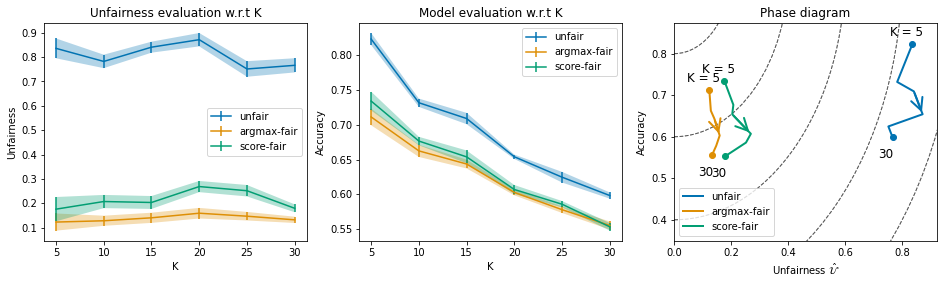

In [28]:
viz_fairness_analysis("K", n_classes_range, kss_classes_twomethods, accs_classes_twomethods, None, pareto = True)

#### 3.1.2. Analysis of beta for softmax

In [70]:
# # for CE
# beta_range = np.concatenate(([0.001], np.arange(0.01,0.21,0.01), [0.5]))
beta_range = np.arange(0.005,0.09+0.005,0.005)

analysis_args["param"] = "beta"
analysis_args["n_times"] = 15
analysis_args["draw_pool_in_train"] = False
analysis_args["param_range"] = beta_range
analysis_args["compute_hard"] = True

kss_beta, accs_beta, times_beta = analysis_argmax_fairness(**analysis_args)

analysis_args["compute_hard"] = False

0.005
0.01
0.015
0.02
0.025
0.030000000000000002
0.034999999999999996
0.04
0.045
0.049999999999999996
0.055
0.06
0.065
0.07
0.07500000000000001
0.08
0.085
0.09000000000000001


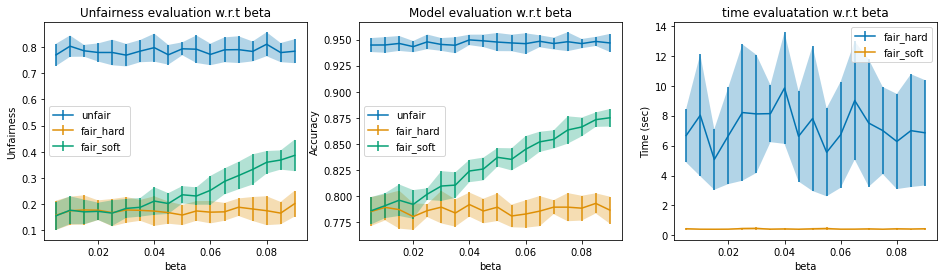

In [71]:
viz_fairness_analysis("beta", beta_range, kss_beta, accs_beta, times_beta)

#### 3.1.3. Analysis of p

In [74]:
p_range = np.concatenate((np.arange(0.5,1,0.1), [0.95]))

analysis_args_twomethods["param"] = "p"
analysis_args_twomethods["n_times"] = 30
analysis_args_twomethods["draw_pool_in_train"] = False
analysis_args_twomethods["param_range"] = p_range

kss_p_twomethods, accs_p_twomethods, times_p_twomethods = analysis_twomethods_fairness(**analysis_args_twomethods)

0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.95


In [28]:
import pickle

#pickle.dump(accs_p_twomethods, open('accs_p_twomethods.pickle', 'wb'))
#pickle.dump(kss_p_twomethods, open('kss_p_twomethods.pickle', 'wb'))

accs_p_twomethods = pickle.load(open('accs_p_twomethods.pickle', "rb"))
kss_p_twomethods = pickle.load(open('kss_p_twomethods.pickle', "rb"))
p_range = np.concatenate((np.arange(0.5,1,0.1), [0.95]))

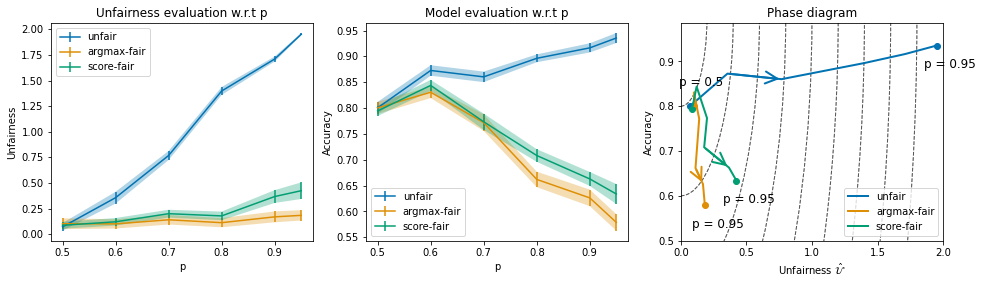

In [36]:
viz_fairness_analysis("p", p_range, kss_p_twomethods, accs_p_twomethods, None, pareto = True)

### 3.2. Summary of hyper-parameter's analysis so far

**Splitting / n_pool**

**rk** : when the n_pool = 0, we use the training set instead

- the unlabeled set is <font color='red'>**not drawn**</font> from the training set

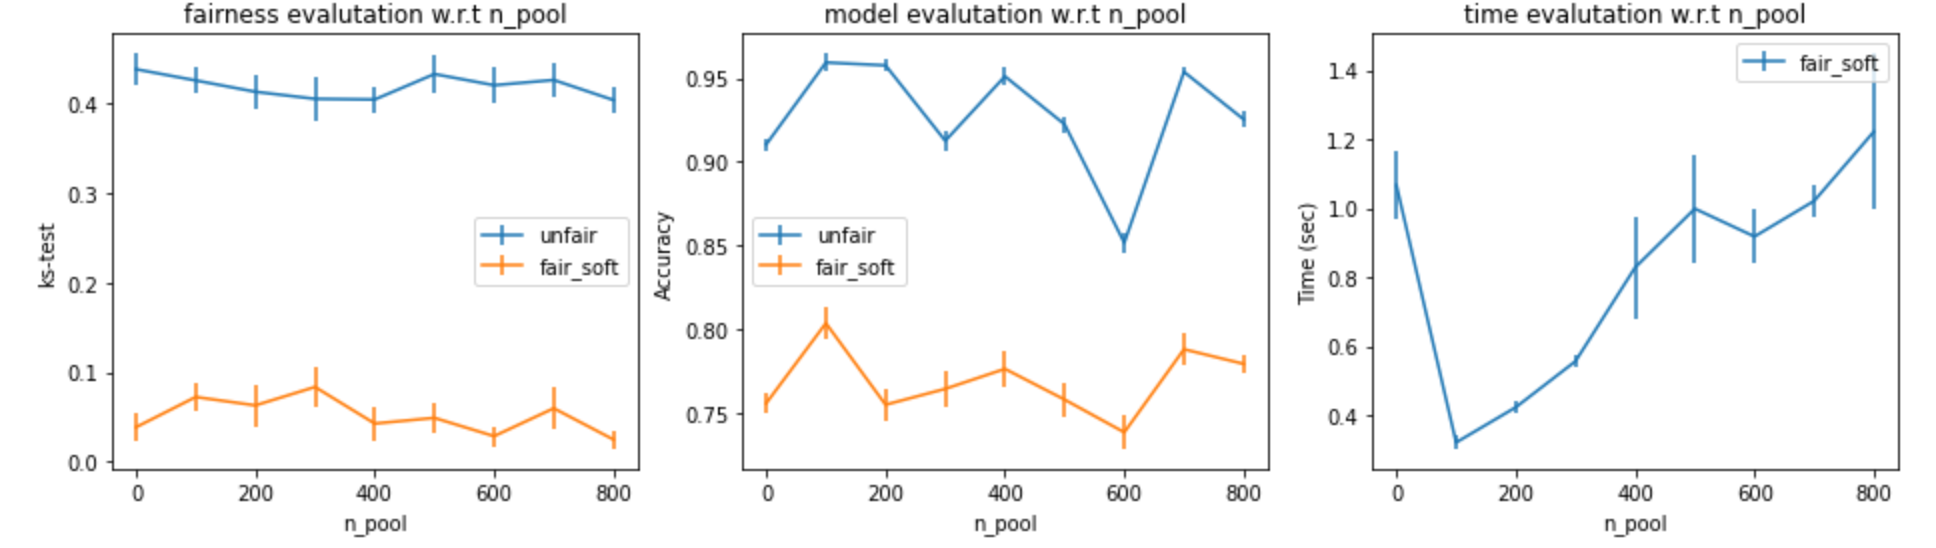

- the unlabeled set is <font color='red'>**drawn**</font> from the training set (so we reduce the training set)

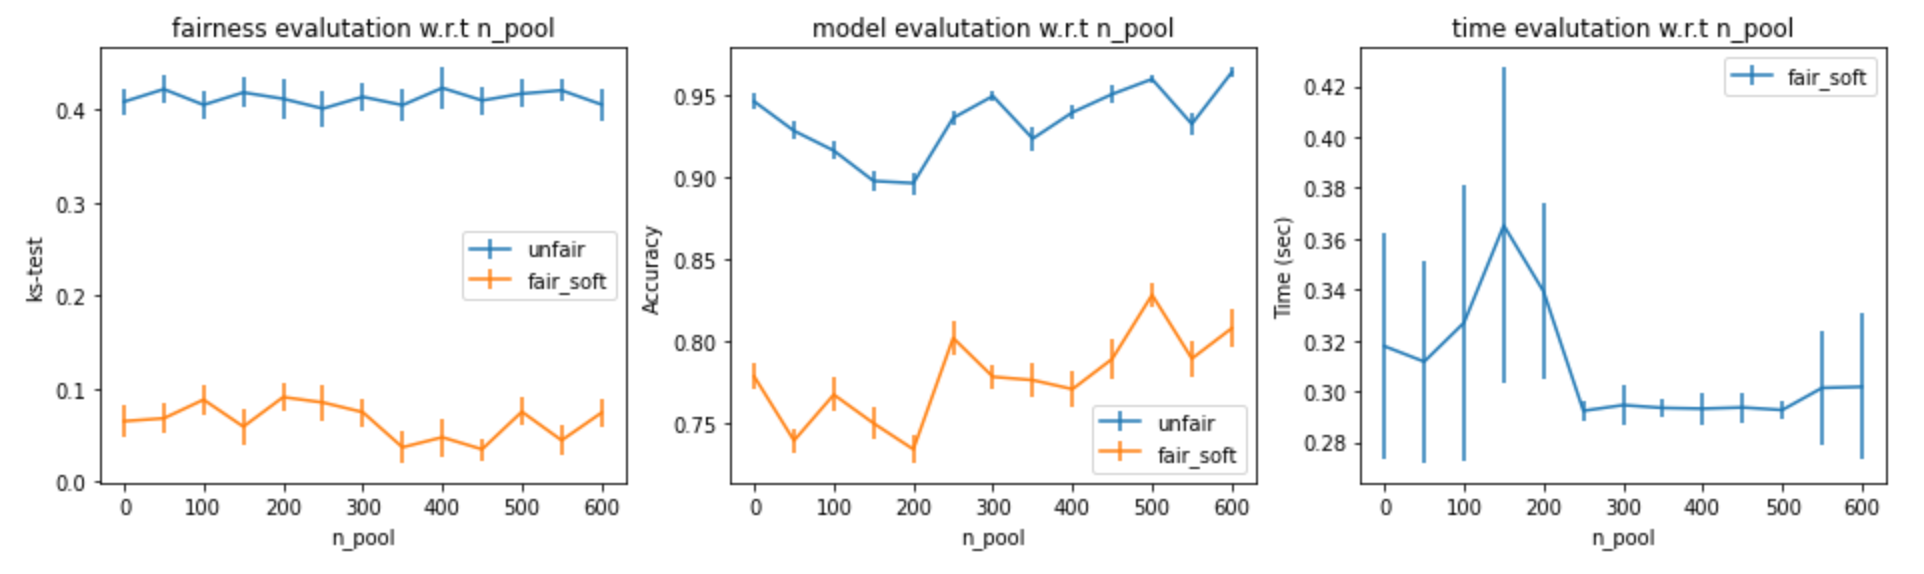

**Beta**

For $beta\in[0.02, 0.04, \dots, 0.4]$

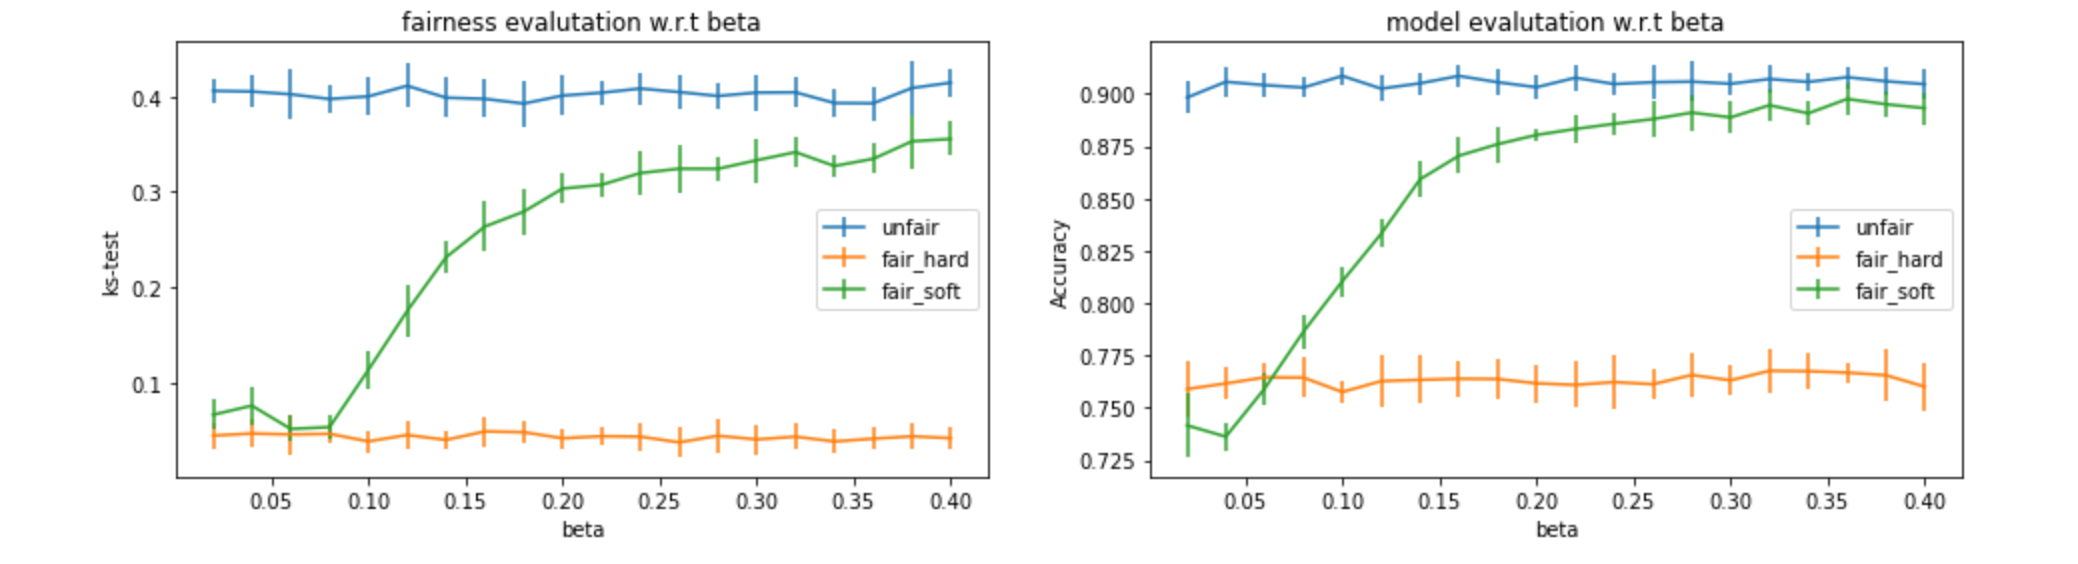

For $beta\in[0.001, 0.01, 0.02,0.03 \dots,0.19, 0.2, 0.5]$ with **time evaluation + <font color="red">CE</font> optimization for $\lambda_{\text{soft}}$**

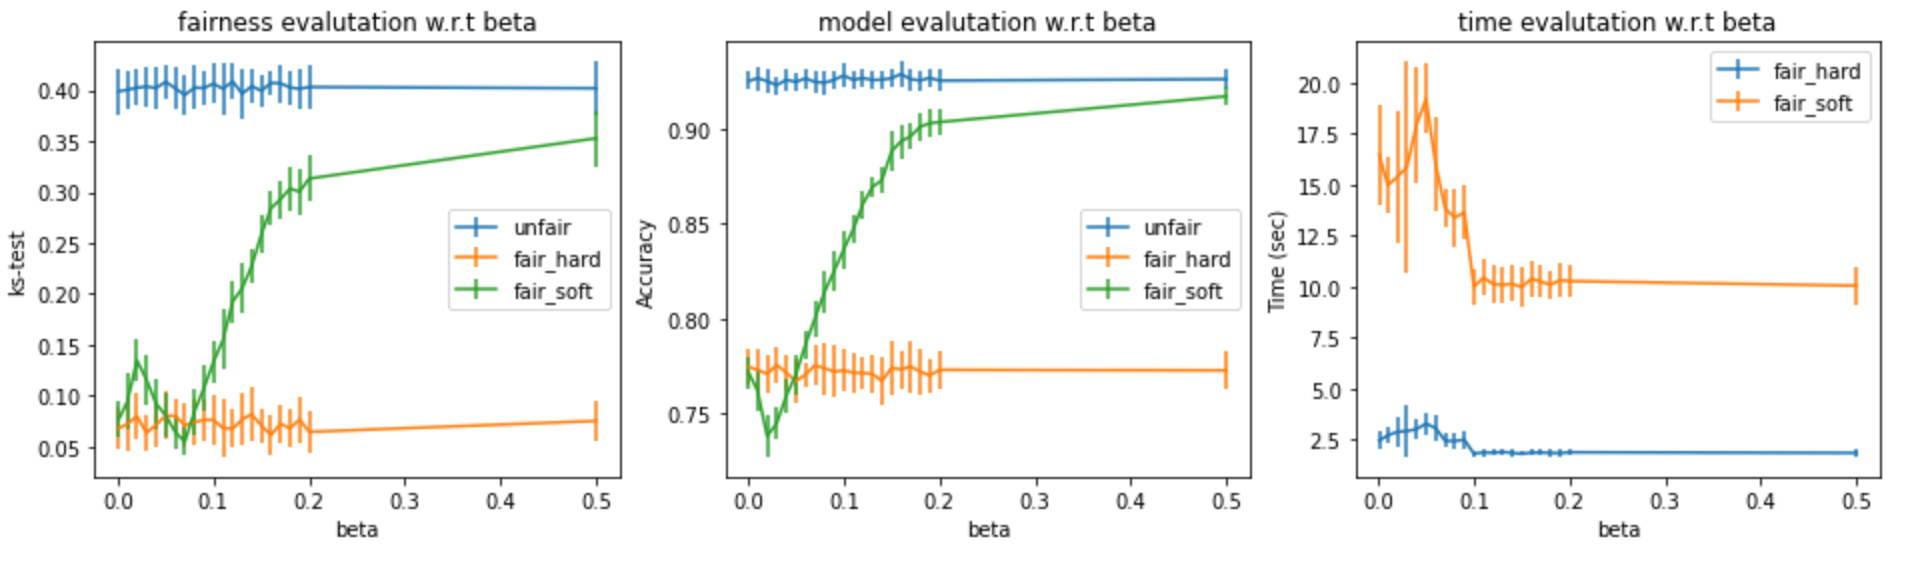

For $beta\in[0.002,0.004,\dots, 0.1]$ with **time evaluation + <font color="red">SAGD</font> optimization for $\lambda_{\text{soft}}$**

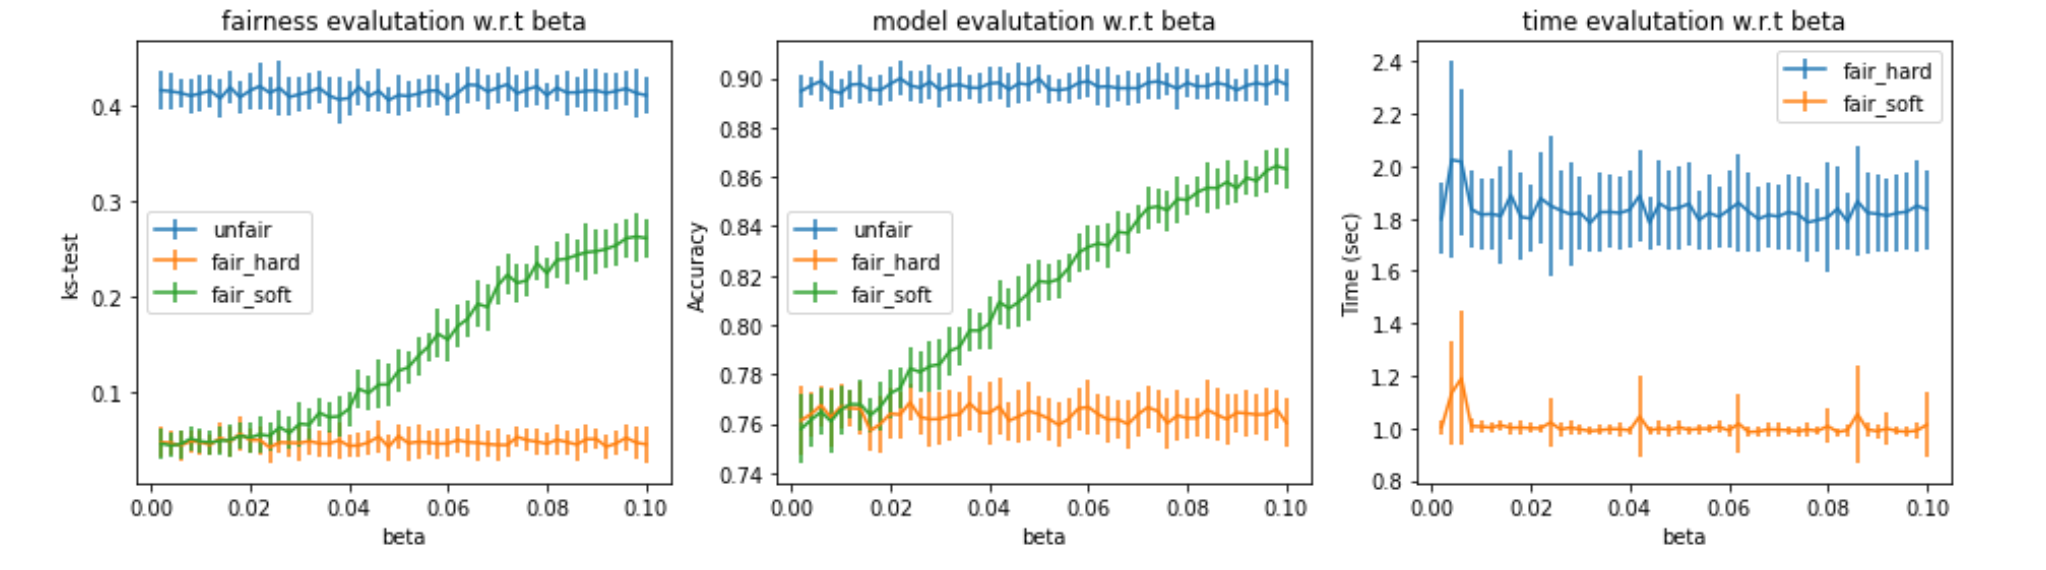

**number of classes : k**

For $k \in[5, 10, 15, 20, 25, 30]$

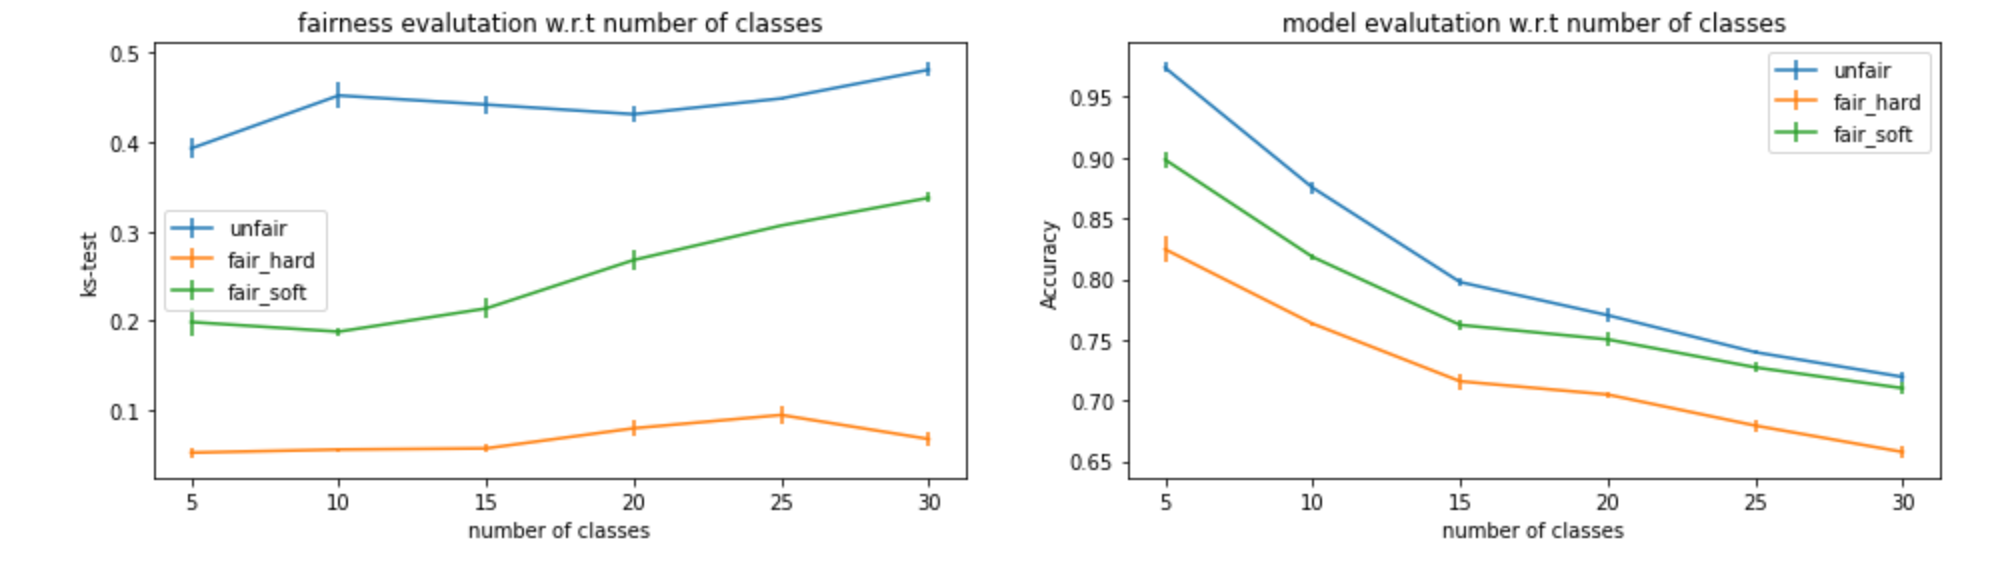

For $k \in[5, 10, 15, 20, 25, 30]$ with **time evaluation + <font color="red">CE</font> optimization for $\lambda_{\text{soft}}$**

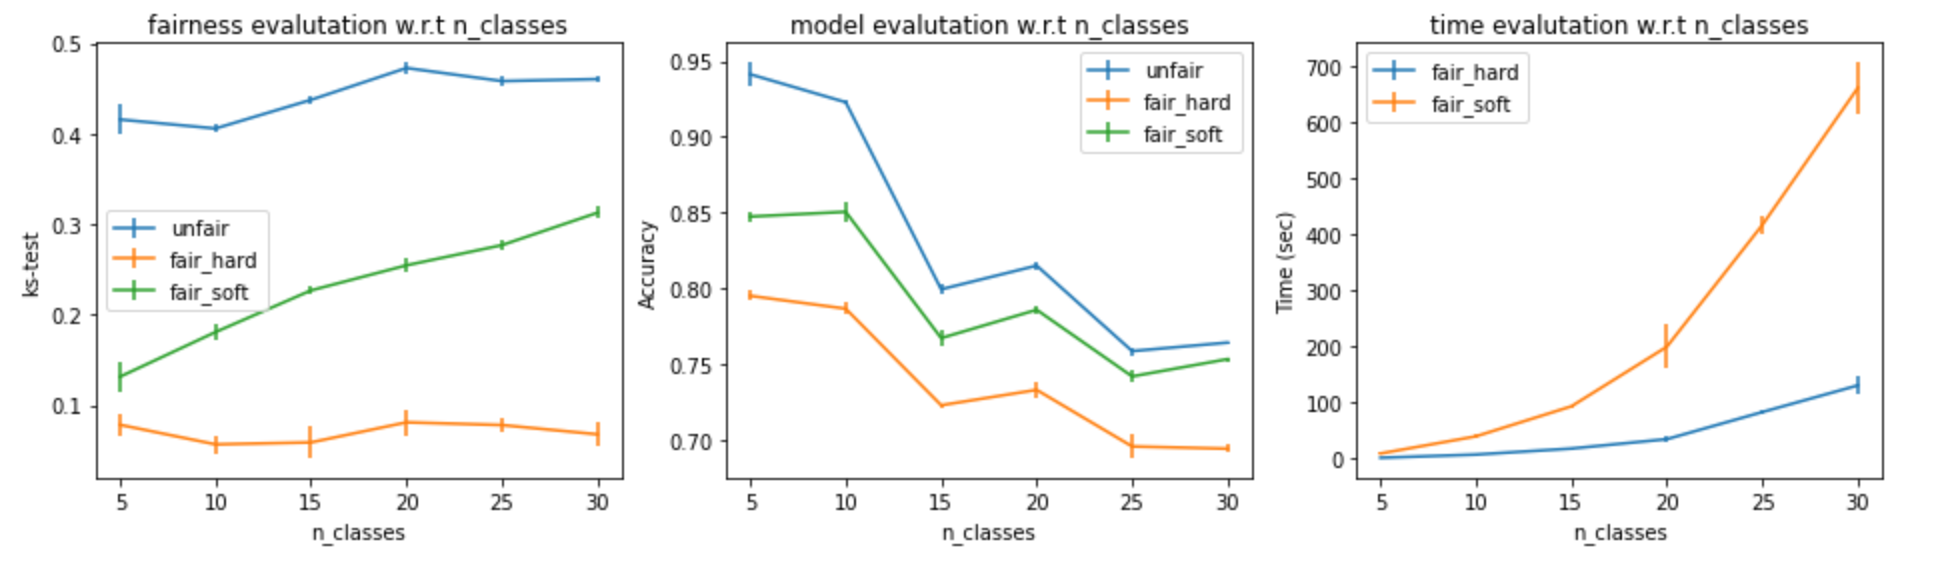

For $k \in[5, 10, 15, 20, 25, 30, 35, 40]$ with **time evaluation + <font color="red">SAGD</font> optimization for $\lambda_{\text{soft}}$**

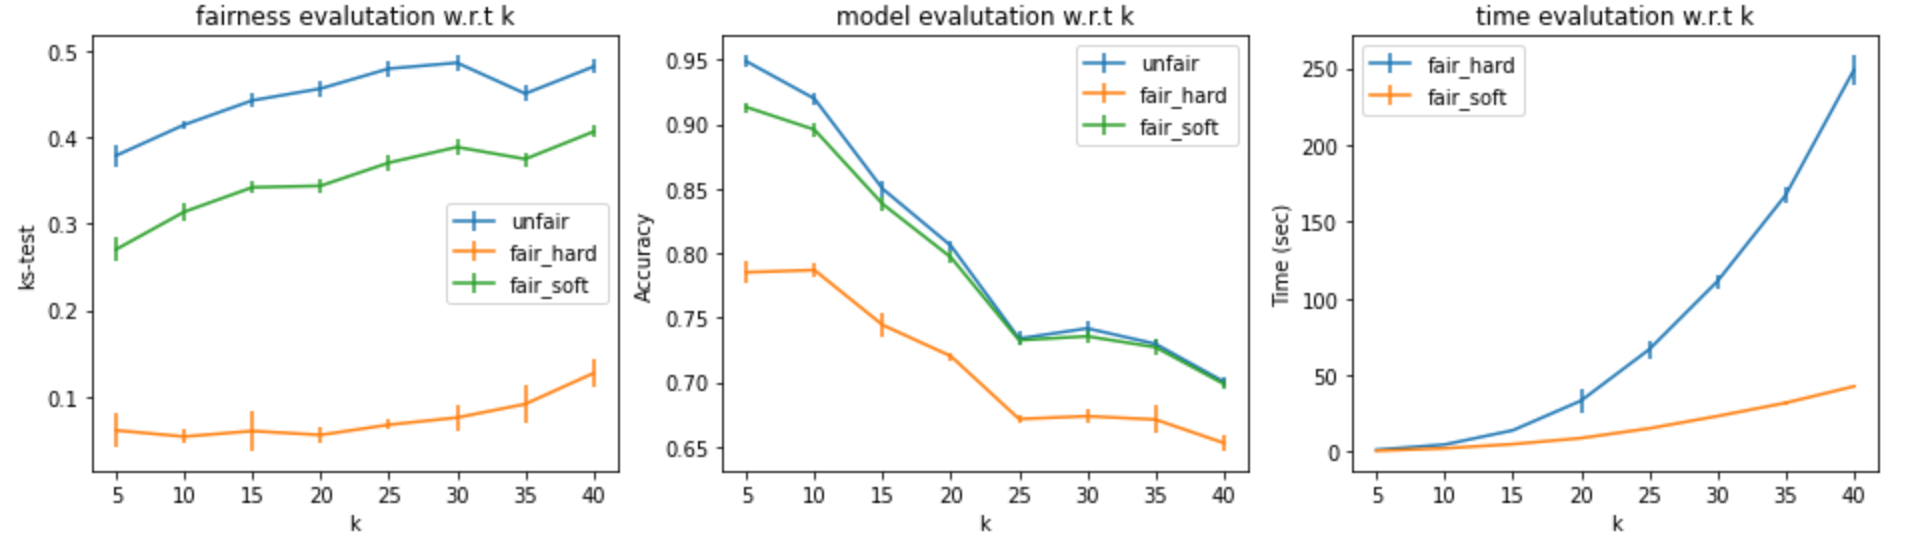

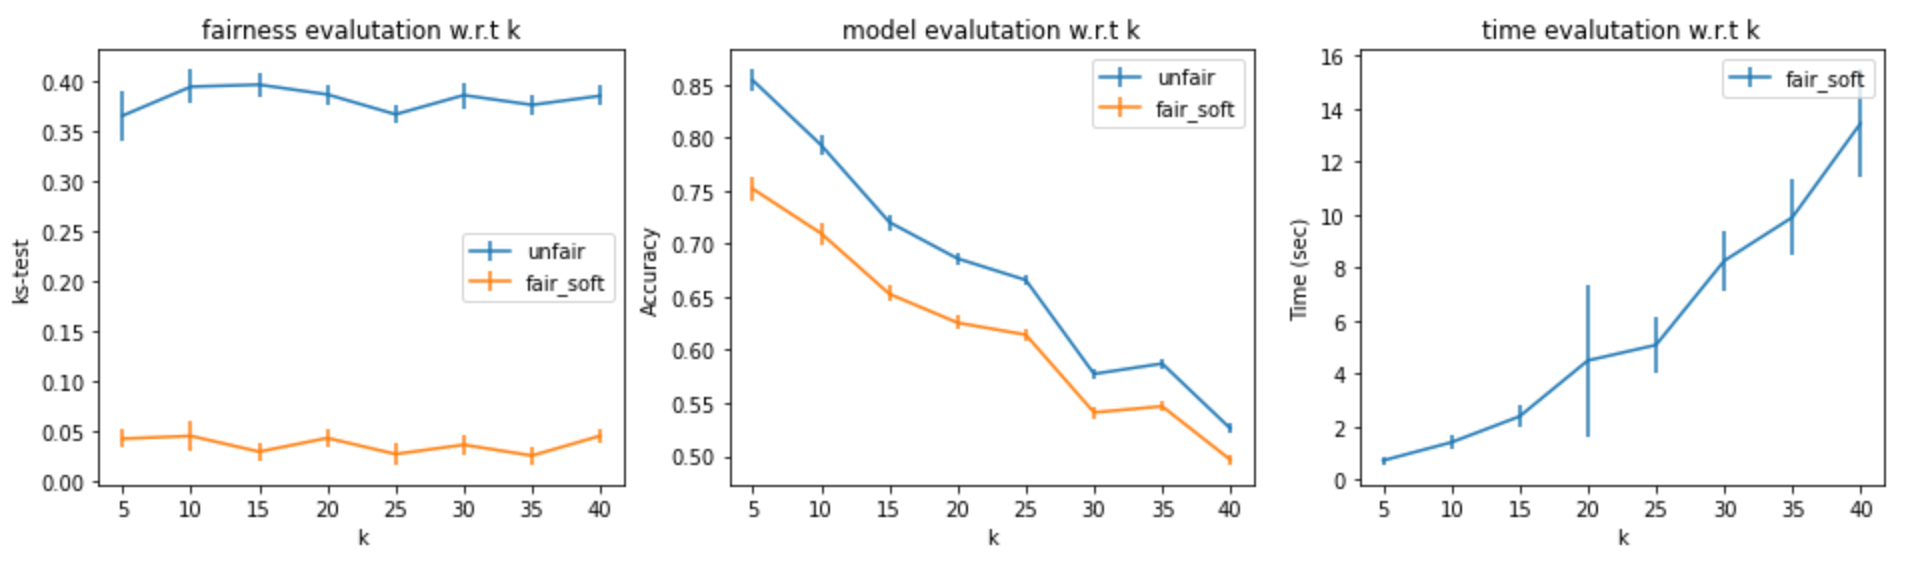

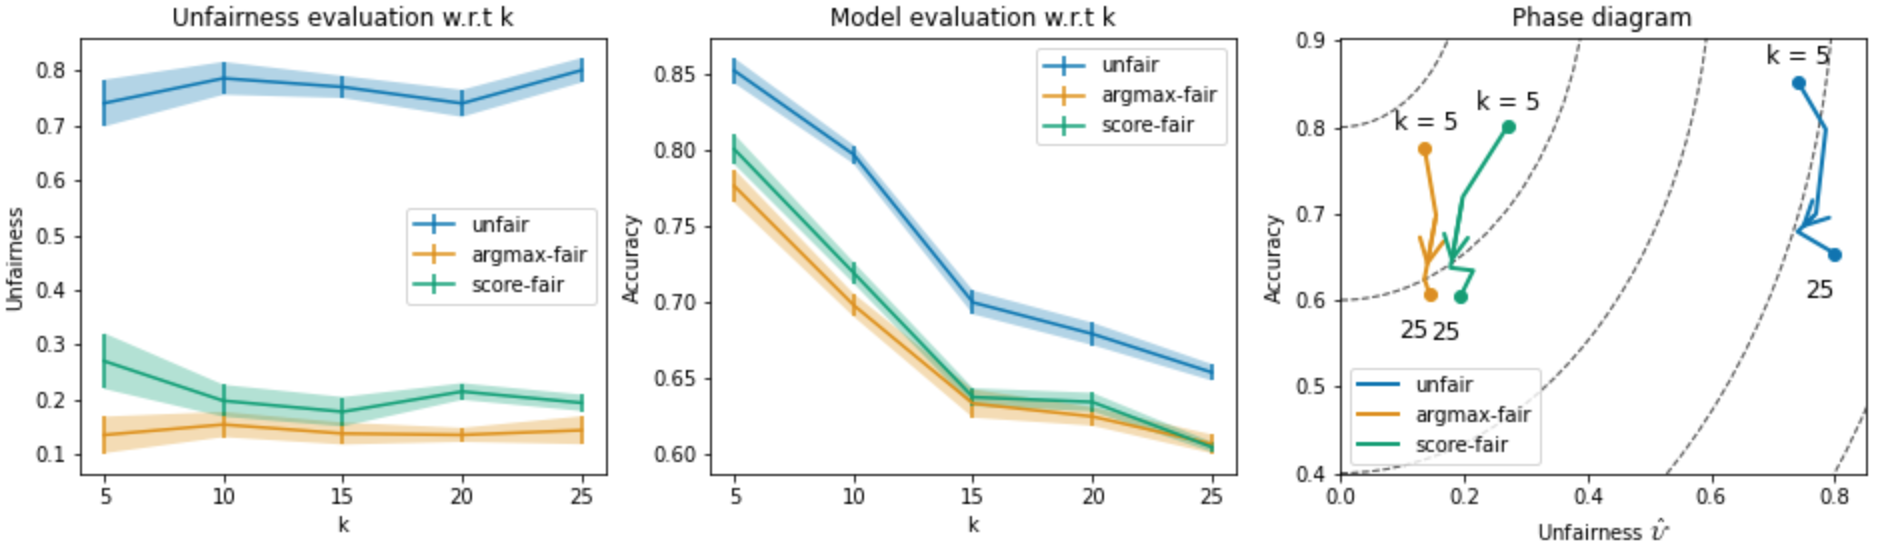

**p**

For $p\in[0, 0.1, \dots, 1]$

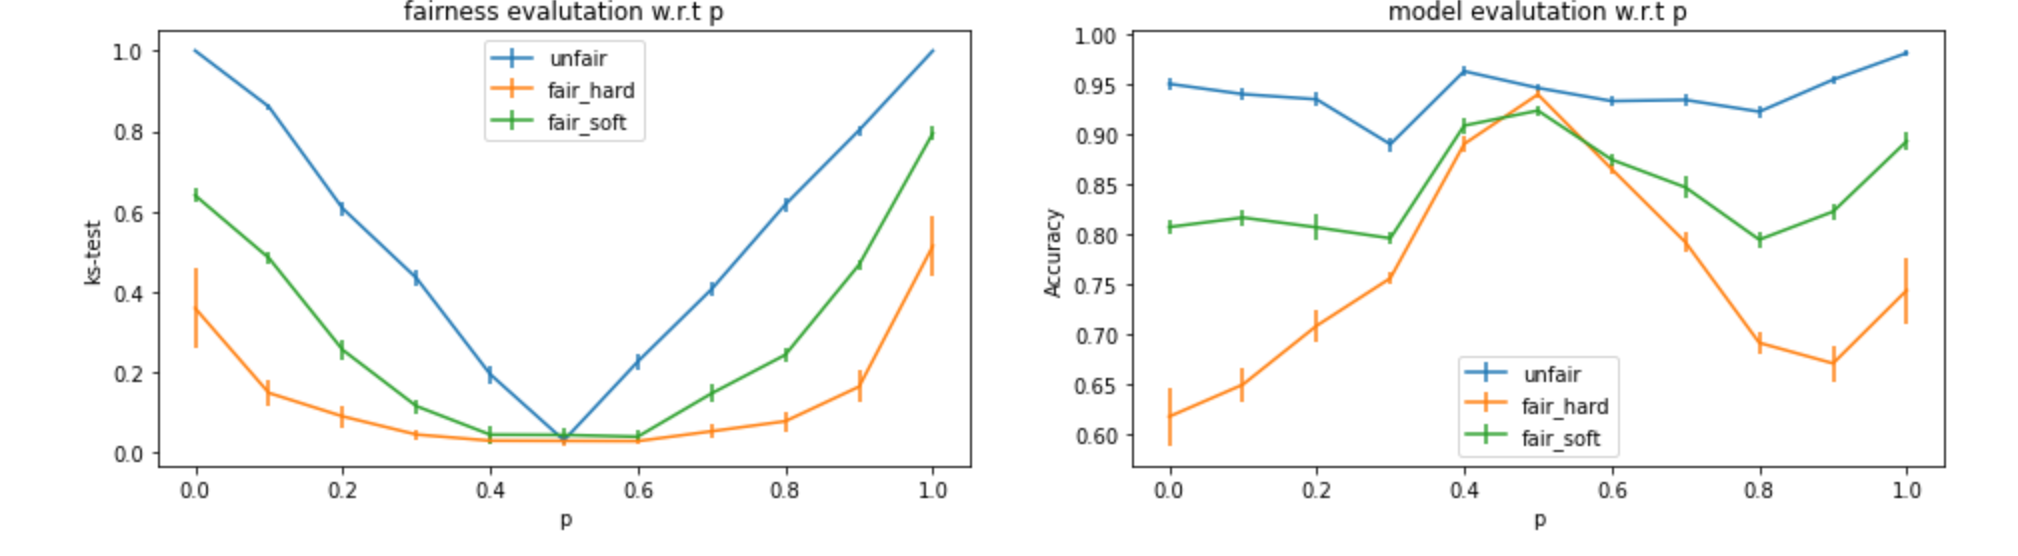

For $p\in[0, 0.1, \dots, 1]$ with **time evaluation + <font color="red">CE</font> for optimization**

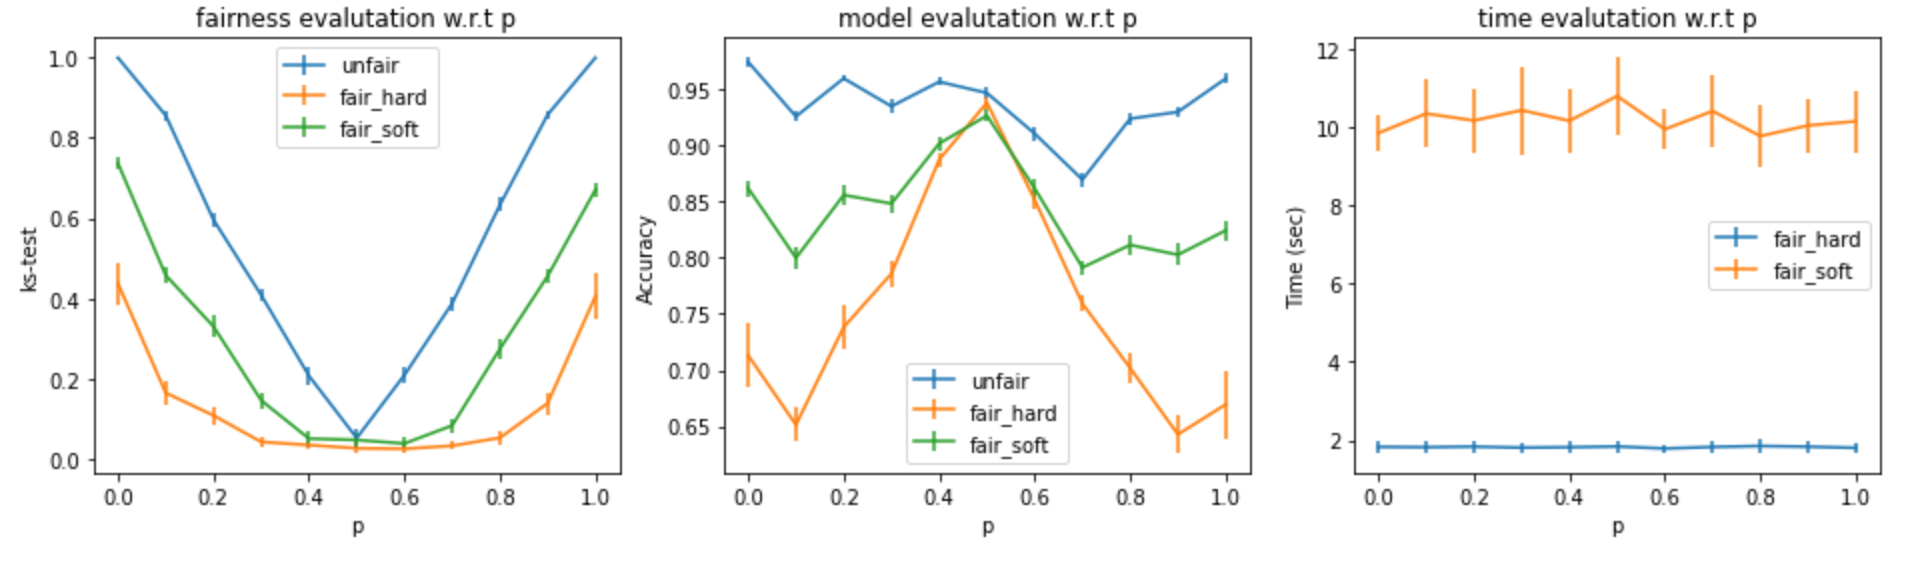

For $p\in[0, 0.1, \dots, 1]$ with **time evaluation + <font color="red">SAGD</font> optimization for $\lambda_{\text{soft}}$**

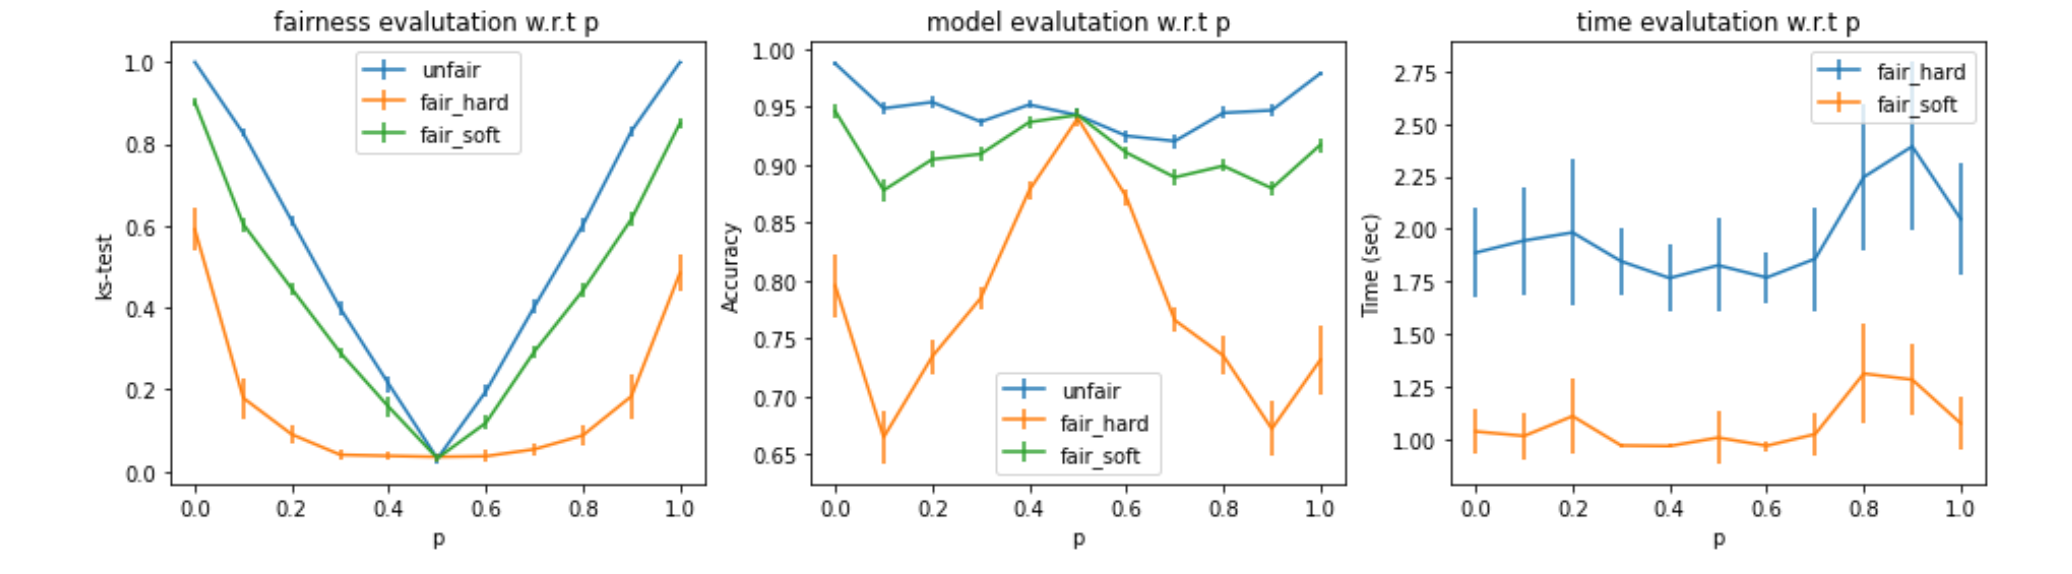

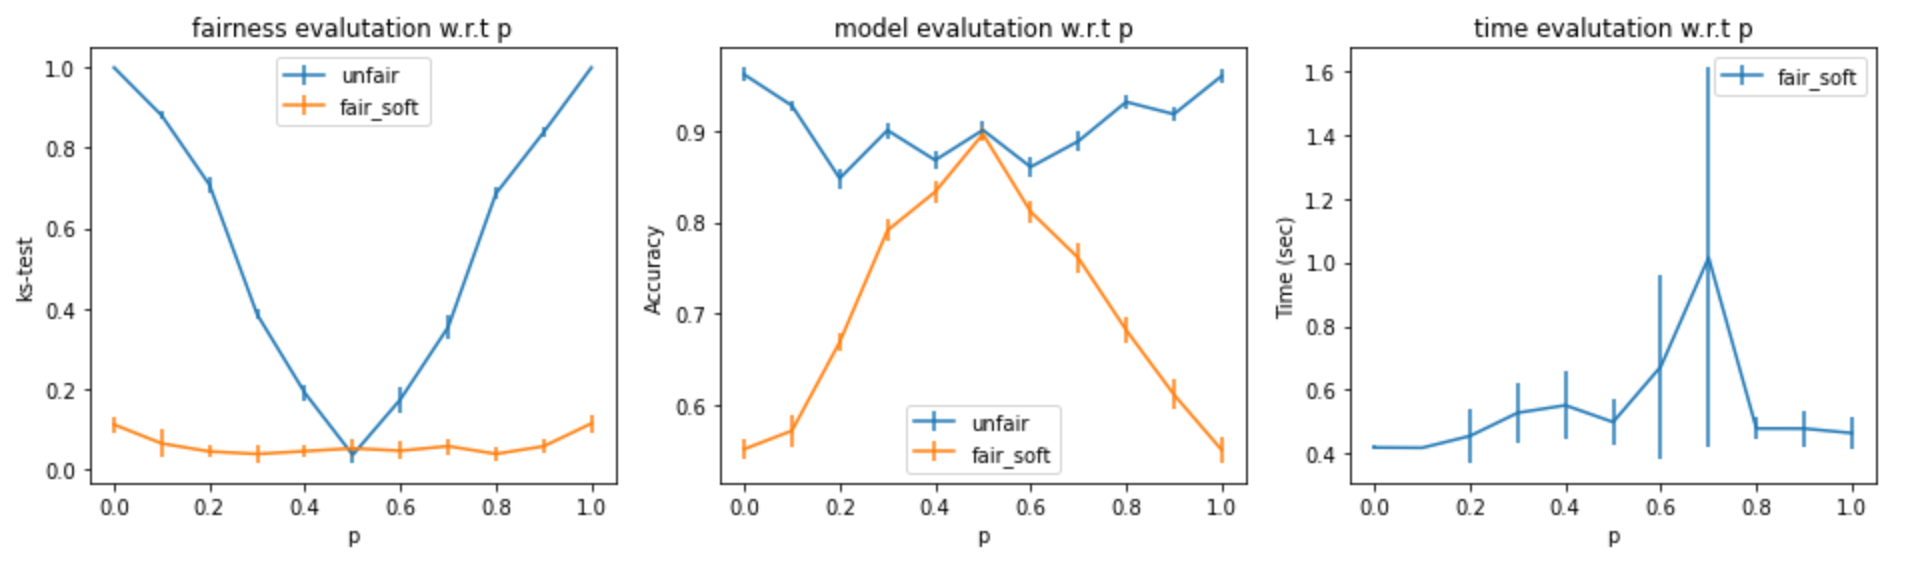

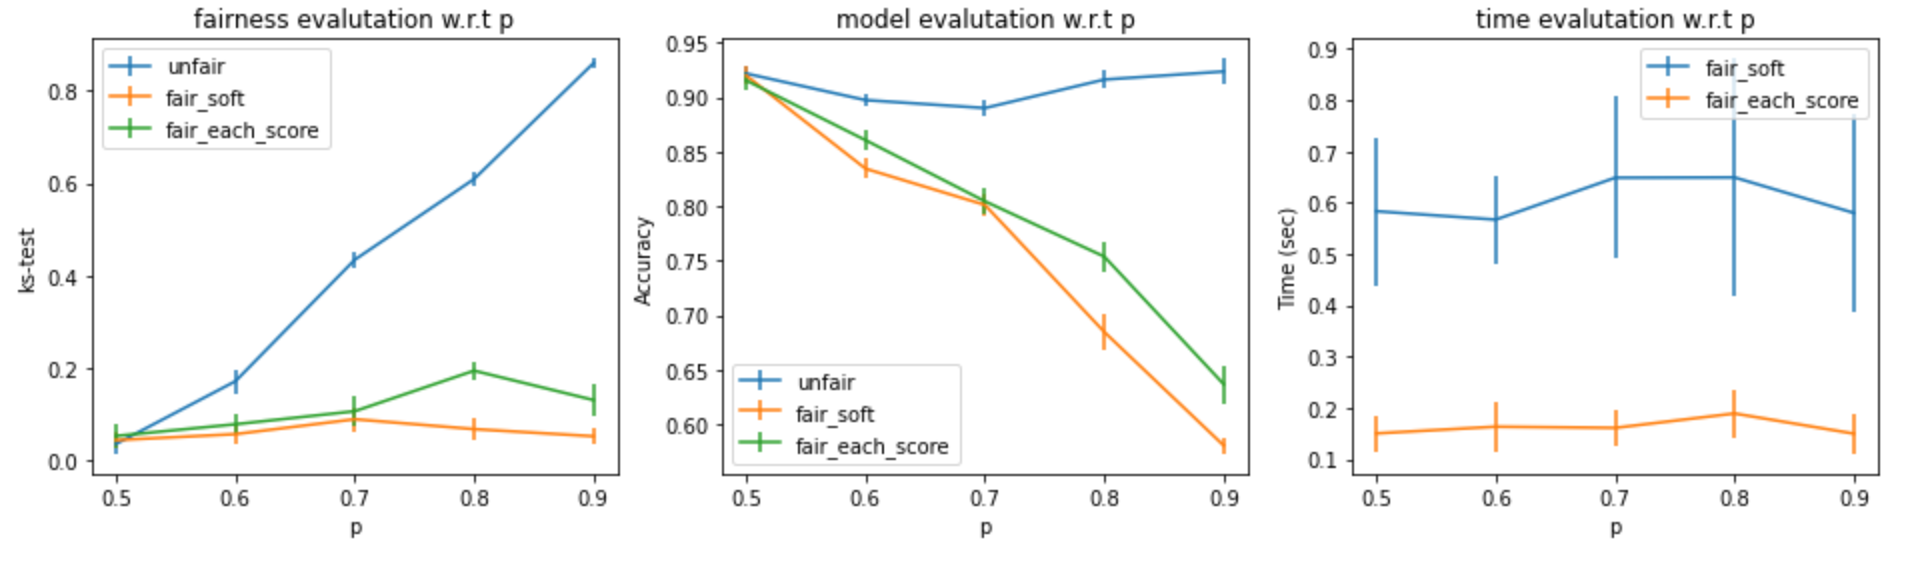